In [2]:
import pandas as pd


import matplotlib.pyplot as plt

import plotly.express as px

# import plotly.graph_objects as go
# import chart_studio.plotly as py


In [10]:
# olist_customers_dataset.csv
# olist_geolocation_dataset.csv
# olist_order_items_dataset.csv
# olist_order_payments_dataset.csv
# olist_order_reviews_dataset.csv
# olist_orders_dataset.csv
# olist_products_dataset.csv
# olist_sellers_dataset.csv
# product_category_name_translation.csv


df = pd.read_csv('../../Data/raw-data/olist_products_dataset.csv')
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
review_df = pd.read_csv('../../Data/raw-data/olist_order_reviews_dataset.csv')
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
review_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [21]:
review_df.shape

(100000, 7)

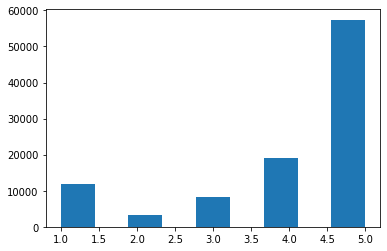

In [20]:
plt.hist(review_df.review_score, bins = 9)
plt.show()

In [23]:
review_df.review_score.isnull().sum()

0

In [24]:
review_df.review_comment_title.isnull().sum()

88285

In [25]:
review_df.review_comment_message.isnull().sum()

58247

In [30]:
review_non_na_df = review_df[review_df.review_comment_message.notna()]
review_non_na_df.shape

(41753, 7)

In [47]:
review_non_na_df.loc[:, 'review_comment_msg_total_words']=review_non_na_df.review_comment_message.str.split().apply(len)
review_non_na_df.loc[:, 'review_comment_msg_total_chars']=review_non_na_df.review_comment_message.apply(len)
# review_non_na_df.loc[:, 'review_comment_msg_words']=review_non_na_df.review_comment_message.str.split().apply(len).value_counts()
review_non_na_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_msg_words,review_comment_msg_total_words,review_comment_msg_total_chars
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,2135.0,6,37
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,2582.0,15,100
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,1957.0,30,174
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,1450.0,7,45
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,1003.0,9,56


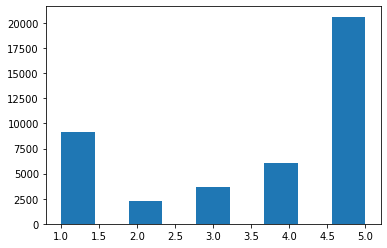

In [51]:
plt.hist(review_non_na_df.review_score, bins = 9)
plt.show()

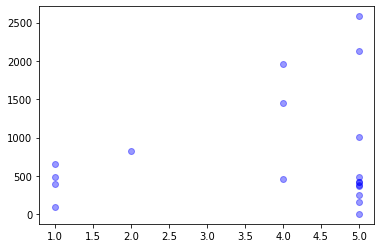

In [44]:
plt.plot(review_non_na_df.review_score, review_non_na_df.review_comment_msg_total_words, 'o', color='blue', alpha=0.4)

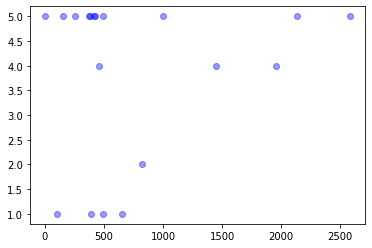

In [45]:
plt.plot(review_non_na_df.review_comment_msg_total_words, review_non_na_df.review_score, 'o', color='blue', alpha=0.4)

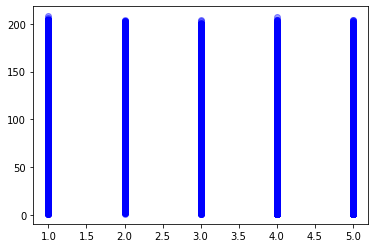

In [48]:
plt.plot(review_non_na_df.review_score, review_non_na_df.review_comment_msg_total_chars, 'o', color='blue', alpha=0.4)

In [12]:
fig = px.histogram(review_df, x="review_score")
fig.show()

In [ ]:
data = [go.Bar(x=df.School, y=df.Gap)]

py.iplot(data, filename='jupyter-basic_bar')